### Objectives
You will be able to:

Use the .map() and .apply() methods to apply a function to a pandas Series or DataFrame
Perform operations to change the structure of pandas DataFrames
Change the index of a pandas DataFrame
Change data types of columns in pandas DataFrames

### Pandas Data Types vs. Base Python Data Types
Built-in Python data types such as lists, dictionaries, and sets can be powerful in limited settings, but they often require:

Several lines of "boilerplate" code to accomplish common tasks, which opens up the possibility of mistakes
Extra unnecessary memory space for storing data types. For example, if you have a Python list of 100 integers, you are also storing the fact that each one is an integer, and you store that same information again if you increase the length of the list by 1
Using pandas data types such as Series and DataFrames instead of built-in Python data types can address both of these issues. Series and DataFrames have a range of built-in methods which make standard practices and procedures streamlined. Some of these methods can result in dramatic performance gains.

### Import pandas

In [245]:
import pandas as pd

### Load and Preview Dataset

In [246]:
df = pd.read_csv('turnstile_180901.txt',dtype=str)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   197625 non-null  object
 1   UNIT                                                                  197625 non-null  object
 2   SCP                                                                   197625 non-null  object
 3   STATION                                                               197625 non-null  object
 4   LINENAME                                                              197625 non-null  object
 5   DIVISION                                                              197625 non-null  object
 6   DATE                                                                  197625 non-null  objec

### Using .map() to Transform Values
A standard data preparation step you might need to perform is "cleaning up" the values of a dataset so they follow your desired format. The .map() method is key for this task.
### Passing in a Dictionary
One of the most straightforward ways to use the .map() method on a pandas Series is with a dictionary of values you want to use to replace other values.

Let's say we want to look at the DIVISION column:


In [248]:
df['DIVISION'].value_counts()

IRT    72198
IND    69274
BMT    41727
PTH    12788
SRT     1386
RIT      252
Name: DIVISION, dtype: int64

#### use value counts to understand the distribution of categorical data
**Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)**
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

Example


In [249]:
import numpy as np
index = pd.Index([3, 1, 2, 3, 4, np.nan])
index.value_counts()

3.0    2
1.0    1
2.0    1
4.0    1
dtype: int64

With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
. Normalizing is giving you the rate of occurrences of each value instead of the number of occurrences.

In [250]:
sum(index.fillna(0))
index.value_counts(normalize=True) # on 3 is 2 occurences out of 5 i.e(2+1+1+1) 2/5=0.4

3.0    0.4
1.0    0.2
2.0    0.2
4.0    0.2
dtype: float64

In [251]:
1/5

0.2

In [252]:
#With dropna set to False we can also see NaN index values.
index.value_counts(dropna=False)

3.0    2
1.0    1
2.0    1
4.0    1
NaN    1
dtype: int64

#### We look up some additional information, and locate the following mappings:

|Abbreviation|Full Name
|------------|---------
|IRT	        |Interborough Rapid Transit Company
|IND            |Independent Subway System
|BMT  	        |Brooklyn–Manhattan Transit Corporation
|PTH	        |Port Authority Trans-Hudson (PATH)
|SRT	        |Staten Island Rapid Transit
|RIT	        |Roosevelt Island Tram

To represent this in Python, let's use a dictionary with the abbreviations as keys and full names as values.

In [253]:
division_mapping = {
    'IRT':'Interborough Rapid Transit Company',
    'IND':'Independent Subway System',
    'BMT':'Brooklyn–Manhattan Transit Corporation',
    'PTH':'Port Authority Trans-Hudson (PATH)',
    'SRT':'Staten Island Rapid Transit',
    'RIT':'Roosevelt Island Tram'
}

Now we can call the .map() method to return a Series with the abbreviations transformed into full names:

In [254]:
df['DIVISION'].map(division_mapping)

0         Brooklyn–Manhattan Transit Corporation
1         Brooklyn–Manhattan Transit Corporation
2         Brooklyn–Manhattan Transit Corporation
3         Brooklyn–Manhattan Transit Corporation
4         Brooklyn–Manhattan Transit Corporation
                           ...                  
197620                     Roosevelt Island Tram
197621                     Roosevelt Island Tram
197622                     Roosevelt Island Tram
197623                     Roosevelt Island Tram
197624                     Roosevelt Island Tram
Name: DIVISION, Length: 197625, dtype: object

#### Let's go ahead and replace the DIVISION column in df with these new, transformed values:

In [255]:
df['DIVISION'] = df['DIVISION'].map(division_mapping)
df['DIVISION'].value_counts()

Interborough Rapid Transit Company        72198
Independent Subway System                 69274
Brooklyn–Manhattan Transit Corporation    41727
Port Authority Trans-Hudson (PATH)        12788
Staten Island Rapid Transit                1386
Roosevelt Island Tram                       252
Name: DIVISION, dtype: int64

### Passing in a 
Another way to use the .map() method is by passing in a function.

Let's say we want to look at the LINENAME column:

In [256]:
df['LINENAME'].value_counts()

1        24092
6        11263
7         9562
F         7146
25        6881
         ...  
ACG        210
S          210
ND         209
S2345      168
23ACE      168
Name: LINENAME, Length: 113, dtype: int64

The ... in the middle means this is a shortened version of the full value counts. Length: 113 means there are 113 different categories present in the column.

Rather than substituting these values with some other values like we did with DIVISION, let's say we want a boolean (True or False) value representing whether or not the LINENAME contains the string "N" (i.e. whether or not the stop is an N line stop). We can do this with a function.

In [257]:
def contains_n(text):
    if 'N' in text:
        return True
    else:
        return False
    
# Or the shorter, more pythonic way
# (this overwrites the previous function)
def contains_n(text):
    return 'N' in text

Then call the .map() method and pass in the function:

In [258]:
[df['LINENAME'].map(contains_n)]

[0          True
 1          True
 2          True
 3          True
 4          True
           ...  
 197620    False
 197621    False
 197622    False
 197623    False
 197624    False
 Name: LINENAME, Length: 197625, dtype: bool]

Note that for a pandas Series, the .apply() method can be used interchangeably with the .map() method when a function is provided (with somewhat different implementations "under the hood"):

In [259]:
df['LINENAME'].apply(contains_n)

0          True
1          True
2          True
3          True
4          True
          ...  
197620    False
197621    False
197622    False
197623    False
197624    False
Name: LINENAME, Length: 197625, dtype: bool

Rather than replacing LINENAME in the dataframe, let's create a new column to hold this result:

In [260]:
df['On_N_Line'] = df['LINENAME'].map(contains_n)
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,REGULAR,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,REGULAR,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,REGULAR,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,REGULAR,0000005554,0000000348 ...,False


In [261]:
df['On_N_Line'].value_counts(normalize=True)

False    0.870441
True     0.129559
Name: On_N_Line, dtype: float64

In [262]:
172021/(172021+25604)

0.8704414927261227

Functions + .map() Explanation
Above we used the .map() method for Pandas series (documentation here). This allows us to pass a function that will be applied to each and every data entry within the series. This line of Python code:

In [263]:
df['On_N_Line'] = df['LINENAME'].map(contains_n)

Is essentially the equivalent of this:

In [264]:
#create an empty list
on_n_line = []
#loop over every row in the dataframe
for _,row in df.iterrows():
    # Call the function to see if LINENAME contains N
    row_contains_n = contains_n(row['LINENAME'])
     # Append this result to a list
    on_n_line.append(row_contains_n)
## Add this list to the dataframe as a new column
#df['On_N_Line'] = on_n_line

Note that the above snippet is much more complicated than the .map() syntax AND the code would run more slowly because it is less efficient. If you ever find yourself trying to write a for loop that loops over all rows in a DataFrame, you are probably doing it wrong.

As shorthand, since this function is only one line we could also pass a lambda function to determine whether or not each row was on the N line or not, rather than declaring a separate function:

In [265]:
df['On_N_Line'] = df['LINENAME'].map(lambda x:'N' in x)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True


This is shorter and equivalent to the functions defined above. Lambda functions are often more convenient, but have less functionality than defining functions explicitly.
### Vectorized Pandas Logic for N Line
Even better than using .map() with a custom function is using one of the highly efficient methods built into pandas. These will exist for most common tasks, and checking whether a string contains another string is no exception. The best way to make the On_N_Line column is actually using pandas.Series.str.contains


In [266]:
df['On_N_Line'] = df['LINENAME'].str.contains('N',regex=False)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True


Sometimes, like with this example, the naming is slightly different between base Python and pandas. In base Python we ask whether one string is in another, whereas in pandas we ask whether one .contains another. Try browsing the available methods on the left side menu of the pandas documentation to find what you're looking for in cases like this.

Whether you use .map() or .str.contains() will matter more as the dataframe size increases. If you are working with a relatively small dataframe, you may have an easier time if you focus on figuring out something that works rather than worrying too much about finding the optimal technique.
### pandas.Series.str.contains
**Series.str.contains(pat, case=True, flags=0, na=None, regex=True)**
Test if pattern or regex is contained within a string of a Series or Index.

Return boolean Series or Index based on whether a given pattern or regex is contained within a string of a Series or Index.

In [267]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])
s1

0               Mouse
1                 dog
2    house and parrot
3                  23
4                 NaN
dtype: object

In [268]:
#Returning a Series of booleans using only a literal pattern.
s1.str.contains('og',regex=False)

0    False
1     True
2    False
3    False
4      NaN
dtype: object

In [269]:
#Returning an Index of booleans using only a literal pattern.
ind = pd.Index(['Mouse', 'dog', 'house and parrot', '23.0', np.nan])
ind.str.contains('23',regex=False)

Index([False, False, False, True, nan], dtype='object')

In [270]:
#Specifying case sensitivity using case.
s1.str.contains('oG', case=True, regex=True)

0    False
1    False
2    False
3    False
4      NaN
dtype: object

In [271]:
#Specifying na to be False instead of NaN replaces NaN values with False. If Series or Index does not contain NaN values the resultant dtype will be bool, otherwise, an object dtype.
s1.str.contains('og', na=False, regex=True)

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [272]:
#Returning ‘house’ or ‘dog’ when either expression occurs in a string.
s1.str.contains('house|dog', regex=True)

0    False
1     True
2     True
3    False
4      NaN
dtype: object

In [273]:
#Ignoring case sensitivity using flags with regex.
import re
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

0    False
1    False
2     True
3    False
4      NaN
dtype: object

In [274]:
s1

0               Mouse
1                 dog
2    house and parrot
3                  23
4                 NaN
dtype: object

Ensure pat is a not a literal pattern when regex is set to True. Note in the following example one might expect only s2[1] and s2[3] to return True. However, ‘.0’ as a regex matches any character followed by a 0.

In [275]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])
s2.str.contains('.0', regex=True)

0     True
1     True
2    False
3     True
4    False
dtype: bool

### Tansforming Columns
### Cleaning Column Names
Sometimes, you have messy column names. Let's look at what we currently have:


In [276]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'On_N_Line'],
      dtype='object')

You might notice that the EXITS column has a lot of annoying whitespace following it.

We can quickly use a list comprehension to clean up all of the column names

In [277]:
[col.strip() for col in df.columns]

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS',
 'On_N_Line']

Because there are relatively few column names, a list comprehension like that is usually sufficient. However you can use similar techniques to the ones described above if you need to:

In [278]:
df.columns.str.strip()

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

In [279]:
df.columns.map(lambda col : col.strip())

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

Note that none of these have actually modified the columns so far:

In [280]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'On_N_Line'],
      dtype='object')

We need to reassign df.columns for this to happen:

In [281]:
# Even though this is assigning a list of strings, it
# will be cast to an Index automatically
df.columns = [col.strip() for col in df.columns]
df.columns


Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'On_N_Line'],
      dtype='object')

### Renaming Columns
You can also rename columns using dictionaries. Unlike .map(), which will replace values with NaN if they do not have an associated key in the dictionary, .rename() will only replace values that appear in the dictionary. This is useful if you only want to replace some values.

Let's say we want to rename C/A to CONTROL_AREA (the data dictionary indicates that this is what it stands for).

In [282]:
df.rename(columns={
    'C/A' : 'CONTROL_AREA'
})

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,REGULAR,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,REGULAR,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,REGULAR,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,REGULAR,0000005554,0000000348 ...,False


Again, note that the dataframe was not automatically transformed by doing this. If we look at it now, C/A is still there:

In [283]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True


If we want the change to "stick", one way to do that is to use inplace=True:

In [284]:
df.rename(columns={
    'C/A' : 'CONTROL_AREA'
},inplace = True)

In [285]:
df.head()

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True


Note that this behavior (not changing the contents of the dataframe unless you use inplace=True or reassign the variable) is not a mistake or oversight in pandas. It is a useful feature that lets you preview the outcome of an operation before permanently applying it. This is especially important if you are dropping data or transforming it in a way that is not reversible.

### Dropping Columns
Let's say we have determined that the DESC column doesn't matter. We can test out dropping it like this:

In [286]:
df.drop('DESC',axis=1)

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,0006736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,05:00:00,0000005554,0000000348 ...,False
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,09:00:00,0000005554,0000000348 ...,False
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,13:00:00,0000005554,0000000348 ...,False
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,08/31/2018,17:00:00,0000005554,0000000348 ...,False


Note the axis=1 argument. By default, df.drop() tries to drop rows (axis=0) with the specified index, e.g.:


In [287]:
df.drop(3).head()

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,True
5,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,20:00:00,REGULAR,0006736562,0002283425 ...,True


If you are trying to drop a column and you forget the axis=1, you'll get an error message like this:

In [288]:
#df.drop('DESC')
#KeyError: "['DESC'] not found in axis"

Let's go ahead and permanently drop that column:

In [289]:
df = df.drop('DESC',axis=1)
df.head()

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,00:00:00,0006736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,04:00:00,0006736087,0002283188 ...,True
2,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,08:00:00,0006736105,0002283229 ...,True
3,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,12:00:00,0006736180,0002283314 ...,True
4,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08/25/2018,16:00:00,0006736349,0002283384 ...,True


### Changing Column Types
Another common data munging technique can be reformatting column types. We first previewed column types above using the df.info() method, which we'll repeat here.

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CONTROL_AREA  197625 non-null  object
 1   UNIT          197625 non-null  object
 2   SCP           197625 non-null  object
 3   STATION       197625 non-null  object
 4   LINENAME      197625 non-null  object
 5   DIVISION      197625 non-null  object
 6   DATE          197625 non-null  object
 7   TIME          197625 non-null  object
 8   ENTRIES       197625 non-null  object
 9   EXITS         197625 non-null  object
 10  On_N_Line     197625 non-null  bool  
dtypes: bool(1), object(10)
memory usage: 15.3+ MB


We can also check the data type of an individual column, rather than listing all of them:

In [291]:
#print(df.ENTRIES.dtype)
print(df['ENTRIES'].dtype)

object


In this case we specified dtype=str when we opened the file, telling pandas to treat all of the columns as strings initially. So currently every column except for On_N_Line is dtype object.

A common transformation needed is converting numbers stored as text (dtype object) to float or integer representations.

Let's look more closely at ENTRIES:

In [292]:
df.loc[:5, 'ENTRIES']

0    0006736067
1    0006736087
2    0006736105
3    0006736180
4    0006736349
5    0006736562
Name: ENTRIES, dtype: object

Those seem like integers. Let's try converting the type:

In [293]:
#my code
pd.to_numeric(df.loc[:5, 'ENTRIES']) # If we want to convert a column to a sensible numeric data type (integer or float), we should use the to_numeric function

0    6736067
1    6736087
2    6736105
3    6736180
4    6736349
5    6736562
Name: ENTRIES, dtype: int64

In [294]:
#Teacher code
df['ENTRIES'] = df['ENTRIES'].astype(int) #converts to a sprcific dtype eg float,int etc
#my code to conver to int 64
#df['ENTRIES'] = df['ENTRIES'].astype('int64') 


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CONTROL_AREA  197625 non-null  object
 1   UNIT          197625 non-null  object
 2   SCP           197625 non-null  object
 3   STATION       197625 non-null  object
 4   LINENAME      197625 non-null  object
 5   DIVISION      197625 non-null  object
 6   DATE          197625 non-null  object
 7   TIME          197625 non-null  object
 8   ENTRIES       197625 non-null  int32 
 9   EXITS         197625 non-null  object
 10  On_N_Line     197625 non-null  bool  
dtypes: bool(1), int32(1), object(9)
memory usage: 14.5+ MB


Attempting to convert a string column to int or float will produce errors if there are actually non-numeric characters. For example, LINENAME:

In [296]:
#df['LINENAME'] = df['LINENAME'].astype(int)
#ValueError: invalid literal for int() with base 10: 'NQR456W'

### Converting Dates
A slightly more complicated data type transformation is creating date or datetime objects. These are pandas data types that have useful information such as being able to quickly calculate the time between two days, or extracting the day of the week from a given date. However, if we look at our current date column, we will notice it is simply a dtype object (all strings).




In [297]:
df['DATE'].head()

0    08/25/2018
1    08/25/2018
2    08/25/2018
3    08/25/2018
4    08/25/2018
Name: DATE, dtype: object

### pd.to_datetime()
This is the handiest of methods when converting strings to datetime objects.

Often you can simply pass the series into this function, but it is good practice to preview the results first to prevent overwriting data if some error occurs.

In [298]:
pd.to_datetime(df['DATE']).head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

That worked.

Note that the dtype has changed from object to datetime64[ns].

Sometimes the above won't work and you'll have to explicitly pass an argument describing how the date is formatted.
To do that, you have to use some datetime codes. Here's a preview of some of the most common ones:

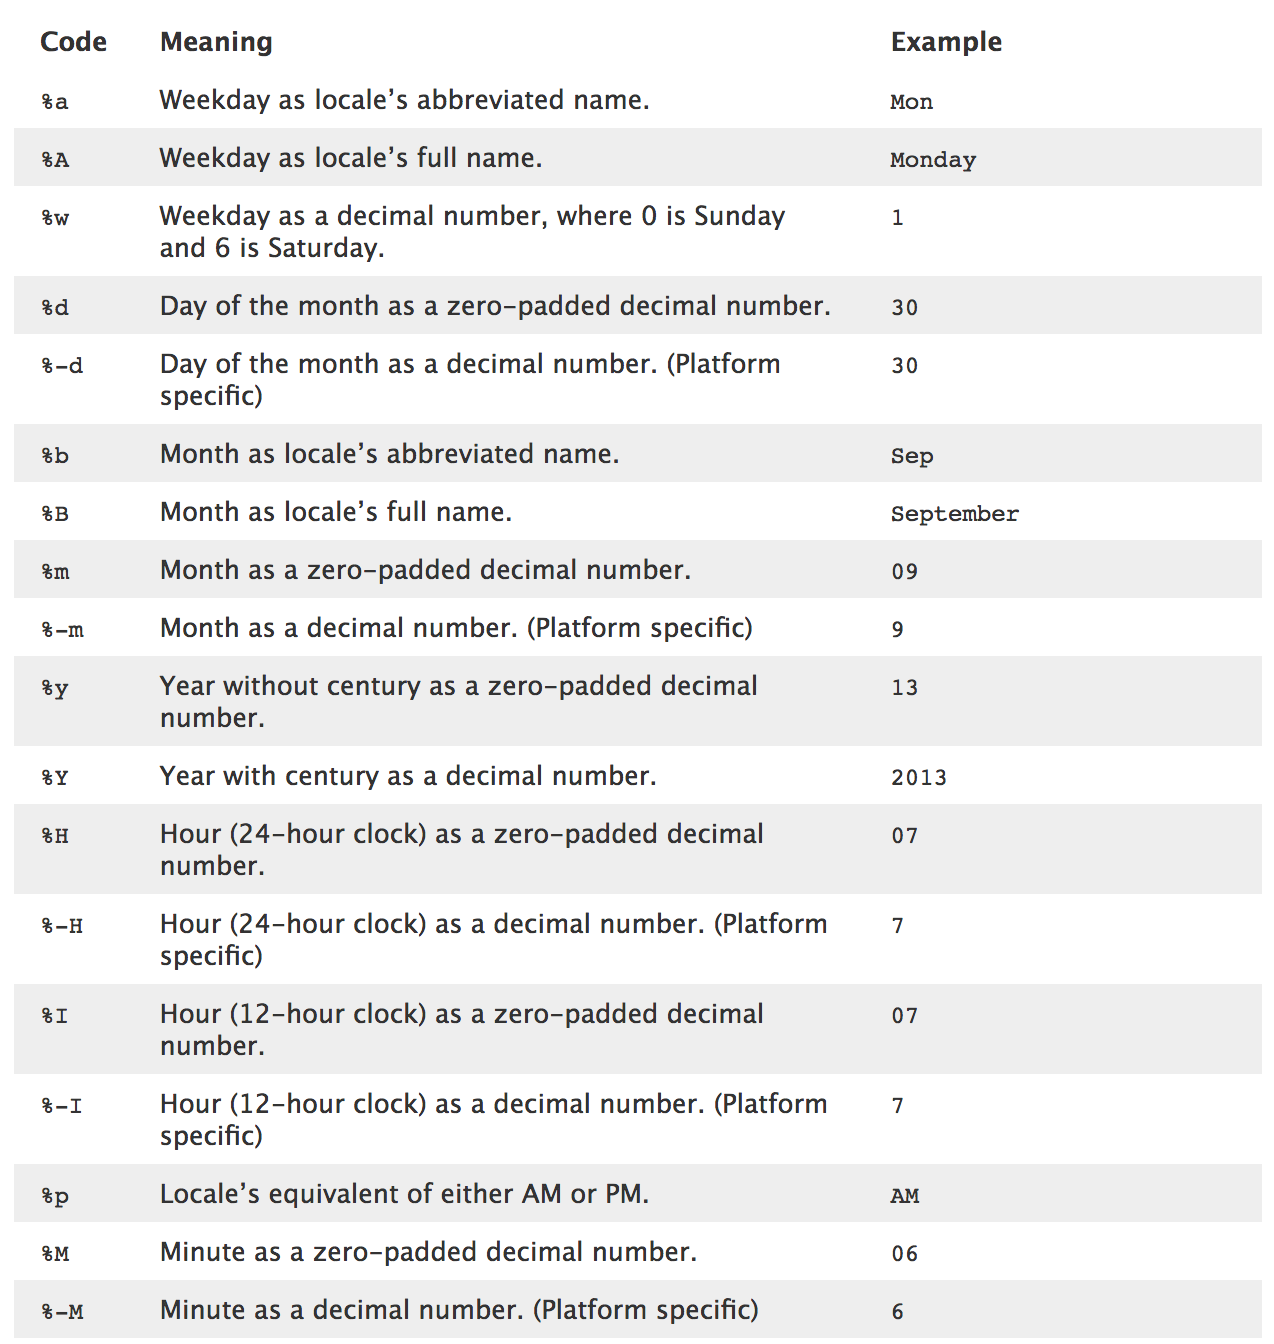

In [299]:
from PIL import Image
Image.open('strftime_codes.png')

To explicitly pass formatting parameters, start by previewing your dates to understand their current format as strings.

In [300]:
#selecting hust the first date entry
df['DATE'].iloc[0]

'08/25/2018'

Based on that, it looks like we have:

08: a month code with zero padding. So that's %m in the table above
/: a delimiter
25: a day of the month. It's not clear that it's zero-padded but we'll go ahead and say it's a %d in the table above
/: another delimiter
2018: a year with the century (it would just be 18 without the century). So that's %Y in the table above

In [301]:
pd.to_datetime(df['DATE'],format='%m/%d/%Y').head()

0   2018-08-25
1   2018-08-25
2   2018-08-25
3   2018-08-25
4   2018-08-25
Name: DATE, dtype: datetime64[ns]

This has the equivalent behavior for this particular dataset as when we skipped the format argument, since pandas was able to detect the format correctly, automatically.

Now let's actually change the whole dataframe's DATE to a datetime (skipping the format since we didn't actually need it here):

In [302]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.head(2)

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,On_N_Line
0,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,2018-08-25,00:00:00,6736067,0002283184 ...,True
1,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,2018-08-25,04:00:00,6736087,0002283188 ...,True


In [303]:
#make a sample of rows so we can see various dates
date_sample = df['DATE'].sample(n=10,random_state=0)
date_sample

91546    2018-08-30
75472    2018-08-31
151239   2018-08-30
77535    2018-08-25
73591    2018-08-27
10204    2018-08-28
51946    2018-08-27
129569   2018-08-26
10655    2018-08-25
11334    2018-08-30
Name: DATE, dtype: datetime64[ns]

### Applying Datetime Methods
Now that we have converted the DATE field to a datetime object we can use some handy built-in methods.

For example, finding the name of the day of the week:

In [304]:
#date_sample.dt.weekday #gets the 0 -6
date_sample.dt.day_name()

91546     Thursday
75472       Friday
151239    Thursday
77535     Saturday
73591       Monday
10204      Tuesday
51946       Monday
129569      Sunday
10655     Saturday
11334     Thursday
Name: DATE, dtype: object

Or, rounding to the nearest 7 days:

In [305]:
date_sample.dt.round('7D')

91546    2018-08-30
75472    2018-08-30
151239   2018-08-30
77535    2018-08-23
73591    2018-08-30
10204    2018-08-30
51946    2018-08-30
129569   2018-08-23
10655    2018-08-23
11334    2018-08-30
Name: DATE, dtype: datetime64[ns]

### Setting a New Index
It can also be helpful to set one of the columns as the index of the DataFrame, such as when graphing.

In [306]:
df = df.set_index('DATE')
df.head()

,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,ENTRIES,EXITS,On_N_Line
DATE,,,,,,,,,,
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,00:00:00,6736067,0002283184 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,04:00:00,6736087,0002283188 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08:00:00,6736105,0002283229 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,12:00:00,6736180,0002283314 ...,True
2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,16:00:00,6736349,0002283384 ...,True


Or the opposite, resetting the index so that the current index becomes a column and a new index is created:

In [307]:
df.reset_index()

,DATE,CONTROL_AREA,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,ENTRIES,EXITS,On_N_Line
0,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,00:00:00,6736067,0002283184 ...,True
1,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,04:00:00,6736087,0002283188 ...,True
2,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,08:00:00,6736105,0002283229 ...,True
3,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,12:00:00,6736180,0002283314 ...,True
4,2018-08-25,A002,R051,02-00-00,59 ST,NQR456W,Brooklyn–Manhattan Transit Corporation,16:00:00,6736349,0002283384 ...,True
...,...,...,...,...,...,...,...,...,...,...,...
197620,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,05:00:00,5554,0000000348 ...,False
197621,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,09:00:00,5554,0000000348 ...,False
197622,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,13:00:00,5554,0000000348 ...,False
197623,2018-08-31,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,Roosevelt Island Tram,17:00:00,5554,0000000348 ...,False
